<a href="https://colab.research.google.com/github/Caculuz-cinks/black_faces_age_estimation/blob/main/2AgeDB_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/AgeDB'

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 56.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 23.4 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=ae2ec98dc760

In [ ]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [ ]:
import re
# pattern = r'([^/]+).JPG$'
#pattern = r'[^/]+(\d{2}).JPG$'
pattern = r'\d+_[a-zA-Z]+_([^/]+)_[a-z].jpg$'
# pattern = r'([A-Za-z0-9]+)\.JPG$'

p = re.compile(pattern)

r = p.search('/content/drive/My Drive/AgeDB/9825_JudyDavis_36_f.jpg')

print(r.group(1))

36


In [ ]:
DATADIR = '/content/drive/My Drive/AgeDB'

In [ ]:
for root, dirs, files in os.walk(DATADIR):
    print(root, len(dirs), len(files))

In [ ]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern, is_regression= True,
                      random_state = 42)

/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/AgeDB/9558_RicardoMontalbаn_70_m.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/AgeDB/9561_RicardoMontalbаn_78_m.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/AgeDB/9537_RicardoMontalbаn_30_m.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/AgeDB/9542_RicardoMontalbаn_41_m.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/AgeDB/9553_RicardoMontalbаn_58_

['label']
      label
4093   69.0
8023   35.0
5964   60.0
3646   22.0
4843   24.0
['label']
       label
7924    56.0
2380    48.0
13577   30.0
2252    36.0
7247    36.0
Found 14659 validated image filenames.
Found 1629 validated image filenames.


In [ ]:
vis.print_image_regression_models()

In [ ]:
model = vis.image_regression_model('pretrained_resnet50', train_data = train_data, val_data = test_data)

In [ ]:
learner = ktrain.get_learner(model = model, train_data = train_data, val_data = test_data, batch_size = 64)

In [ ]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
230/230 [==============================] - 298s 1s/step - loss: 527.3876 - mae: 17.6853 - val_loss: 189.7887 - val_mae: 11.1916
Epoch 2/2
230/230 [==============================] - 295s 1s/step - loss: 171.4887 - mae: 10.4953 - val_loss: 159.5098 - val_mae: 10.1358


In [ ]:
learner.freeze(15)


learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
230/230 [==============================] - 855s 4s/step - loss: 117.6639 - mae: 8.4784 - val_loss: 297.5782 - val_mae: 14.5331
Epoch 2/2
230/230 [==============================] - 851s 4s/step - loss: 49.2729 - mae: 5.4710 - val_loss: 76.0933 - val_mae: 6.7054


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
test_data.filenames[10:20]

['14536_AudreyHepburn_47_f.jpg',
 '926_FranklinDRoosevelt_63_m.jpg',
 '8895_ChristopherEccleston_39_m.jpg',
 '5990_JohnHuston_34_m.jpg',
 '665_TonyBlair_57_m.jpg',
 '12130_FrancescaAnnis_19_f.jpg',
 '16116_SamuelJacksonn_47_m.jpg',
 '9348_GeorgesMarchal_52_m.jpg',
 '7104_GladysCooper_25_m.jpg',
 '1246_RobertOppenheimer_52_m.jpg']

In [ ]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Prredicted Age: %s | Actual Age: %s" % (pred, actual))

Prredicted Age: 32 | Actual Age: 21


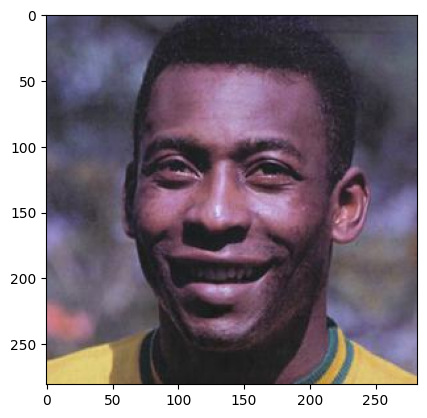

In [ ]:
show_prediction('60_Pele_21_m.jpg')

In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Get the filename of the uploaded image
filenames = list(uploaded.keys())
print(f"Uploaded file: {filenames}")


Saving 16494_EmmanuelAgboola_12_m.jpg to 16494_EmmanuelAgboola_12_m.jpg
Saving 16493_MrsApata_28_f.jpg to 16493_MrsApata_28_f.jpg
Saving 16492_IsrealApata_02_m.jpg to 16492_IsrealApata_02_m.jpg
Saving 16491_MrsOyalola_53_f.jpg to 16491_MrsOyalola_53_f.jpg
Saving 16490_DaddyAdekola_80_m.jpg to 16490_DaddyAdekola_80_m.jpg
Saving 16489_IsaiahAdeleke_22_m.jpg to 16489_IsaiahAdeleke_22_m.jpg
Uploaded file: ['16494_EmmanuelAgboola_12_m.jpg', '16493_MrsApata_28_f.jpg', '16492_IsrealApata_02_m.jpg', '16491_MrsOyalola_53_f.jpg', '16490_DaddyAdekola_80_m.jpg', '16489_IsaiahAdeleke_22_m.jpg']


In [ ]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Prredicted Age: %s | Actual Age: %s" % (pred, actual))

In [ ]:
def real_prediction(image_path):
    # Predict the age using the predictor with the full image path
    pred = round(predictor.predict_filename(image_path)[0])

    # If you want to compare it with the actual age (assuming the age is in the filename):
    actual = int(p.search(image_path).group(1)) if p.search(image_path) else "N/A"

    # Display the image
    vis.show_image(image_path)

    # Print the predicted age and the actual age if available
    print("Predicted Age: %s | Actual Age: %s" % (pred, actual))

Predicted Age: 41 | Actual Age: 12


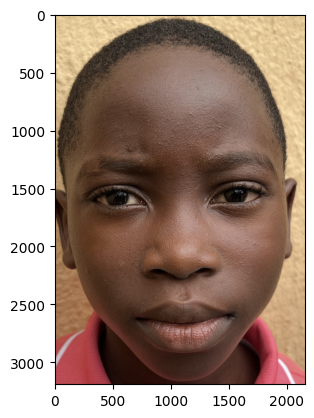

In [ ]:
uploadA = '16494_EmmanuelAgboola_12_m.jpg'
real_prediction(uploadA)


Predicted Age: 41 | Actual Age: 28


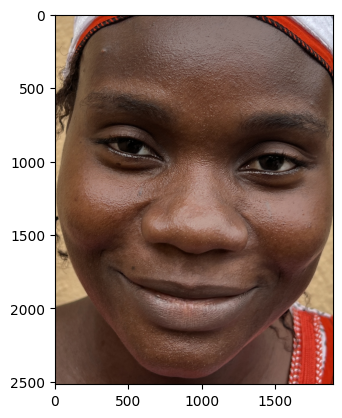

In [ ]:
uploadB = '16493_MrsApata_28_f.jpg'
real_prediction(uploadB)

Predicted Age: 35 | Actual Age: 2


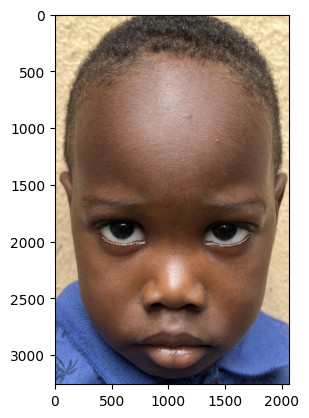

In [ ]:
uploadC = '16492_IsrealApata_02_m.jpg'
real_prediction(uploadC)

Predicted Age: 68 | Actual Age: 80


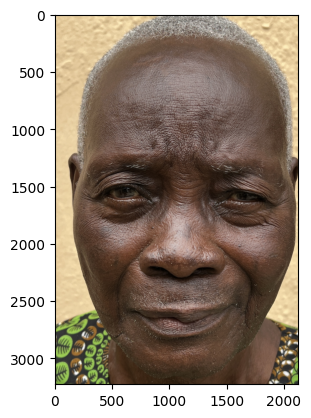

In [ ]:
uploadD = '16490_DaddyAdekola_80_m.jpg'
real_prediction(uploadD)

Predicted Age: 44 | Actual Age: 22


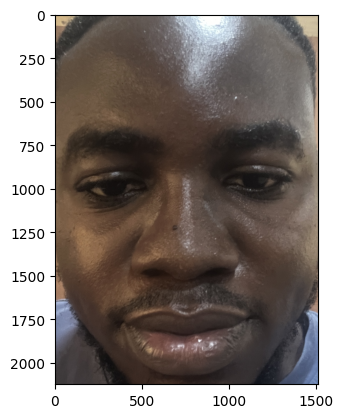

In [ ]:
uploadE = '16489_IsaiahAdeleke_22_m.jpg'
real_prediction(uploadE)